# About Pathrise

Pathrise is an online program that provides 1-on-1 mentorship, training, and advice to help job seekers get the best possible jobs in tech. Every two weeks, Pathrise welcomes a new cohort of fellows. If a candidate is interested in joining our program and successfully passes all stages of our admission process, they receive an offer to join Pathrise and become a fellow. The first 2 weeks in the program are called a free trial period and a fellow can withdraw within this free trial period without any penalty. After 2 weeks, a fellow needs to sign an ISA (Income Share Agreement) with us if they want to stay in the program. The entire program lasts up to a year, including 8 weeks of the core curriculum. If a fellow is unable to find a job within a year after joining Pathrise, his/her contract is terminated. However, there might be some exceptions. For instance, if someone was on a break, we may extend their contract for the period of the break. 

On average, for fellows who stay with us after their free trial period, it takes about 4 months to receive a final job offer. However, there is a lot of variation in fellows’ outcomes. Being able to predict how fast every single fellow is going to find a job is crucial for our business.
 

# Analysis Goal

The main goal of this analysis is to derive insights around if a fellow will ultimately be placed at a company and how long until a placement can be expected.

# Data wrangling

I will start by importing the data I collected from Pathrise. I will organizing the data, and making sure it's well defined before exploring the data.

In [1396]:
#import data wrangling Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [1397]:
#loading the data from Pathrise company. I assigned it to df as in data frame using pandas
df=pd.read_csv("Data_Pathrise.csv")

In [1398]:
#I want to see what is in the first 10 rows.
df.head(10)

,id,company_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
5,6,Closed Lost,SWE,AUG19A,0.0,0,Employed Full-Time,Master's Degree,1-2 months,Technical interviewing,3-4 years,Green Card,5.0,100,Male,East Asian or Asian American
6,7,Closed Lost,SWE,AUG19B,0.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past phone screens,3-4 years,Green Card,0.0,9,Male,"Black, Afro-Caribbean, or African American"
7,8,Withdrawn (Failed),SWE,AUG19A,19.0,0,Employed Part-Time,Bachelor's Degree,Less than one month,Getting past final round interviews,1-2 years,Citizen,4.0,15,Female,Latino or Hispanic American
8,9,Active,SWE,AUG19B,NaN,0,Student,Master's Degree,Less than one month,Technical interviewing,1-2 years,F1 Visa/CPT,1.0,5,Male,East Asian or Asian American
9,10,Withdrawn (Trial),SWE,SEP19A,13.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past final round interviews,3-4 years,Citizen,0.0,10,Male,"Black, Afro-Caribbean, or African American"


there seems to be some NANs in the dataset. I want more insight, so i will use the describe() function

In [1399]:
df.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


In [1400]:
#i want to know how many columns and rows i am dealing with. so i will call the .shape function
df.shape

(2544, 16)

In [1401]:
#i want to explore the data type of each column
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   company_status               2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

I see that the "placed" column is int64. I will need this column and program_duration_days in the future to predict which fellow will be placed or not. This is not final as I need to explore the data more to actually figure out what to do in my regression analysis. 

# Exploratory Data Analysis

In [1402]:
#I want to filter my column of interest "placed" to have a better look using the transpose function
df.placed.T

0       0
1       0
2       0
3       0
4       1
       ..
2539    0
2540    0
2541    0
2542    0
2543    0
Name: placed, Length: 2544, dtype: int64

From this information, it seems like placed with 1 might mean the fellow was placed while 0 means the fellow wasn't or droped out. I wonder if there are more insight on this and how is the rest of columns. I need to count the number of missing values for all the columns. 

In [1403]:
#count the number of missing values
miss_value = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
miss_value.columns=['count', '%']
miss_value.sort_values(by=['%'],ascending=False)

,count,%
program_duration_days,616,24.213836
gender,492,19.339623
work_authorization_status,284,11.163522
employment_status,229,9.001572
professional_experience,222,8.726415
number_of_interviews,218,8.569182
length_of_job_search,74,2.908805
highest_level_of_education,58,2.279874
biggest_challenge_in_search,24,0.943396
race,18,0.707547


24.21% of program_duration_day is missing. It would make sense to drop columns with missing values but the nature of the problem Pathrise is experience demands a thorough insight. Hence I will keep the column and since it is the column with the highest missing values, I will try and work with the rest for now except gender. I do not think gender will have any effect on whether a fellow is placed or not. 

In [1404]:
#Dropping the gender column
df=df.drop(['gender'], axis=1)
df=df.drop(['id'], axis=1) #droping the id since it's pretty much row numbering

In [1405]:
#I will drop rows with missing least values
df.dropna(subset = ['biggest_challenge_in_search','cohort_tag', 'race'], inplace = True)

In [1406]:
# Exploring Categorical Features of the dataset

I want to make sure that there are no duplicates, that each column is unique. 

In [1407]:
df_object = df.select_dtypes('object')

In [1408]:
df_object.columns.value_counts()

professional_experience        1
primary_track                  1
employment_status              1
race                           1
highest_level_of_education     1
biggest_challenge_in_search    1
company_status                 1
length_of_job_search           1
cohort_tag                     1
work_authorization_status      1
dtype: int64

There are no duplicates.

Let's get some insight on each of the numerical feautures and see how they correlate to one another using .corr() function

In [1409]:
df.corr()

,program_duration_days,placed,number_of_interviews,number_of_applications
program_duration_days,1.000000,0.196716,-0.065421,-0.061295
placed,0.196716,1.000000,-0.008074,-0.028331
number_of_interviews,-0.065421,-0.008074,1.000000,0.069849
number_of_applications,-0.061295,-0.028331,0.069849,1.000000


INSIGHTS:
placed and program_duration_days have a positive correlation followed by number_of_application and placed with -0.028331. Looking at the correlation table, it seems like the fellows that turned in less number of applications were most likely going to be placed compare to fellows that have been in the program for a long time. I will show this using a scatterplot to display the three variables at once 

<AxesSubplot:xlabel='number_of_applications', ylabel='program_duration_days'>

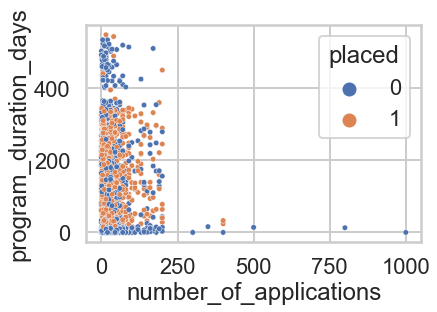

In [1410]:
sns.scatterplot(data=df, y="program_duration_days", x="number_of_applications", hue="placed", s= 30, color=".2")

placed means 1(orange), non-placed means 0(blue). Based on the above plot, fellows who turned in the most applications are less likely going to be placed and they pretty much spend more time in the program. This is very interesting as I would think that the more application turned in, the more they stand a chance of being placed. I am also not naive about problems like this. I would like to dig further to figure out other factors that could be creating a suitation like this. As for now, I think fellows with most applications might not have been submitting a good quality resume and cover letter. I wish Pathrise would create a new column where they will rate fellows resumes for every application they submitted.

<AxesSubplot:xlabel='number_of_applications', ylabel='number_of_interviews'>

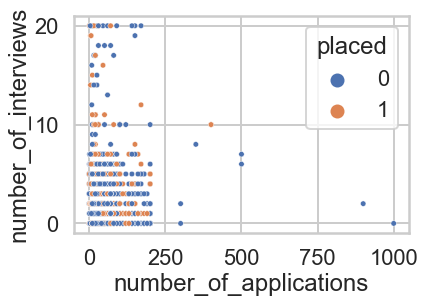

In [1411]:
 sns.scatterplot(data=df, y="number_of_interviews", x="number_of_applications", hue="placed", s= 30, color=".2")

As expected, fellows who were placed received more interviews than those turned in more applications.

<AxesSubplot:xlabel='number_of_applications', ylabel='length_of_job_search'>

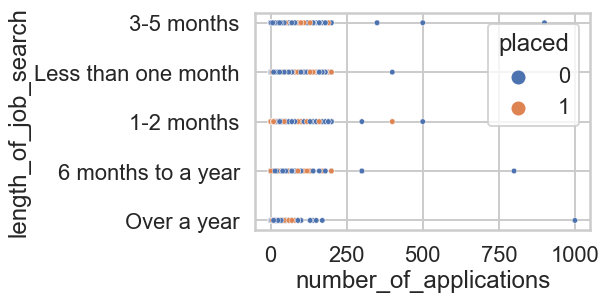

In [1412]:
 sns.scatterplot(data=df, y="length_of_job_search", x="number_of_applications", hue="placed", s= 30, color=".2")

From the aboved, you can see that max number of applications that a placed fellow turned in before being placed is around 400 compare to 1000 by a non-placed fellow. Most placement happens within 1-2 months, followed by less 1 month period. I wonder if there Work Authorization, experience level or level of education has anything to do it. let's find out.

<AxesSubplot:xlabel='number_of_applications', ylabel='work_authorization_status'>

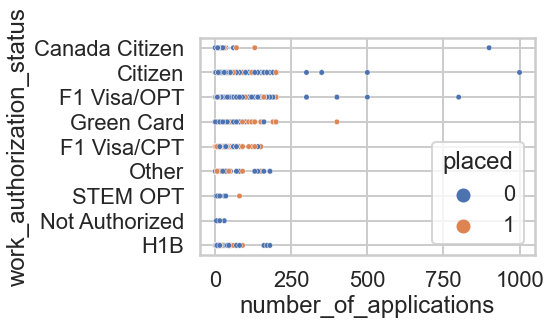

In [1413]:
sns.scatterplot(data=df, y="work_authorization_status", x="number_of_applications", hue="placed", s= 30, color=".2")

It seems like fellows with green card are more likely going to be placed than any other fellows. F1 Visa/CPT fellows are also more likely going to be placed. There might be something else going on here as I would assume that citizens would be placed more easily compare to other fellows with work authorization. Also citizens seemed to be the fellows turning more applications which I have raised concerned about potential poor resume or cover letter. Next I will like to examine their level of eduction and work authorization

<ipython-input-1414-bacd57c081fd>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(df["work_authorization_status"],rotation=90, ha='right')


[Text(0, 0, 'Canada Citizen'),
 Text(1, 0, 'Citizen'),
 Text(2, 0, 'Citizen'),
 Text(3, 0, 'Citizen'),
 Text(4, 0, 'F1 Visa/OPT'),
 Text(5, 0, 'Green Card'),
 Text(6, 0, 'Green Card'),
 Text(7, 0, 'Citizen'),
 Text(8, 0, 'F1 Visa/CPT')]

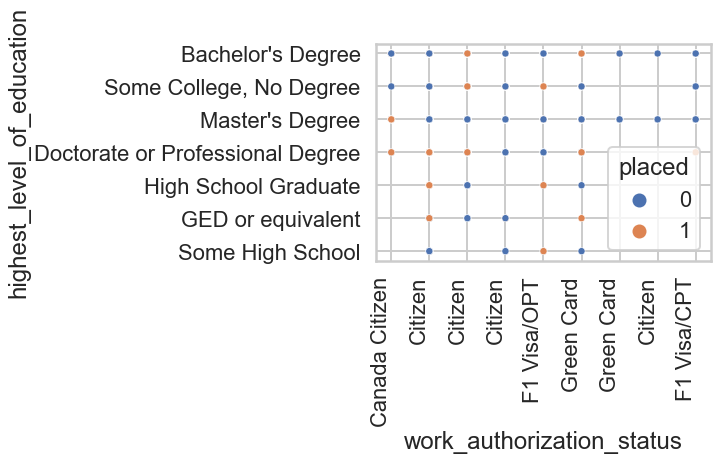

In [1414]:
b=sns.scatterplot(data=df, x="work_authorization_status", y="highest_level_of_education", hue="placed", s= 50, color=".2")
b.set_xticklabels(df["work_authorization_status"],rotation=90, ha='right')

Fellows with Master's Degree were less likely to be placed compare to Bachelor's degree. 

<ipython-input-1415-283c0e7a2bc6>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.set_xticklabels(df["highest_level_of_education"],rotation=90, ha='right')


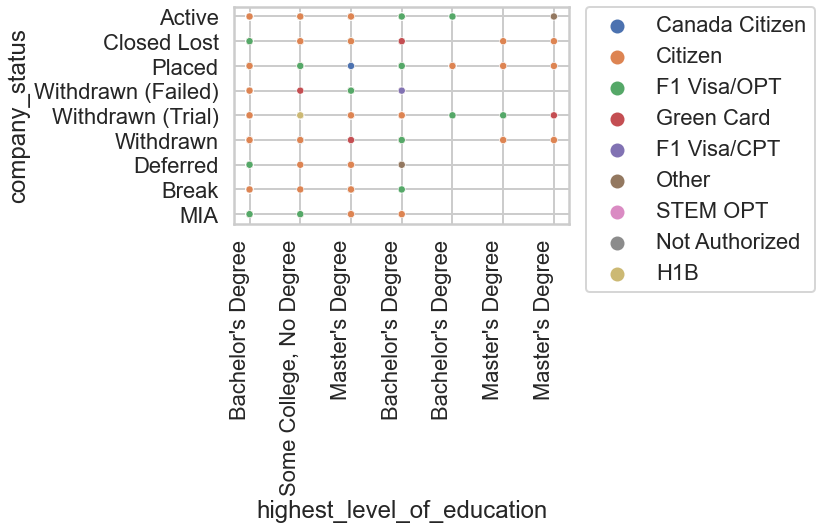

In [1415]:
c=sns.scatterplot(data=df, x="highest_level_of_education", y='company_status', hue= 'work_authorization_status', s= 50, color=".2")
c.set_xticklabels(df["highest_level_of_education"],rotation=90, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fellows that are citizens are more likely to take a break,deferred, withdraw or be classified as closed lost by Pathrise.

<ipython-input-1416-e662d2783d93>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  d.set_xticklabels(df["work_authorization_status"],rotation=90, ha='right')


[Text(0, 0, 'Canada Citizen'),
 Text(1, 0, 'Citizen'),
 Text(2, 0, 'Citizen'),
 Text(3, 0, 'Citizen'),
 Text(4, 0, 'F1 Visa/OPT'),
 Text(5, 0, 'Green Card'),
 Text(6, 0, 'Green Card'),
 Text(7, 0, 'Citizen'),
 Text(8, 0, 'F1 Visa/CPT')]

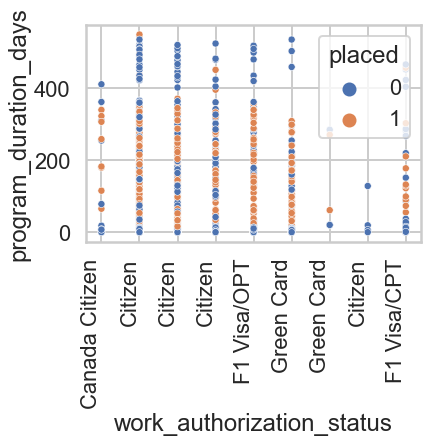

In [1416]:
d=sns.scatterplot(data=df, x="work_authorization_status", y= 'program_duration_days', hue= 'placed', s= 50, color=".2")
d.set_xticklabels(df["work_authorization_status"],rotation=90, ha='right')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

some fellows spent less than 100 days. most of the placement happens within 0-200 days. 

/Applications/anaconda3/envs/springboard/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


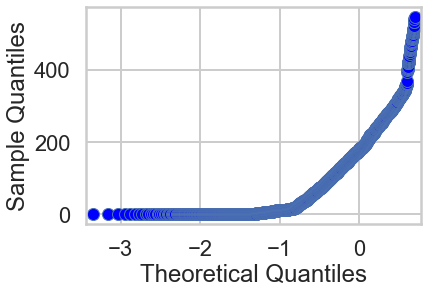

In [1417]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

sm.qqplot(df['program_duration_days'])
pylab.show()

program_duration_days is not normally distributed.

In [1418]:
df['program_duration_days'].median()

111.0

In [1419]:
df['program_duration_days'].std()

126.35817001147359

In [1420]:
#number of fellows who stay below or the median number of days in the program
duration_under_median=df[df['program_duration_days'] <=111].shape[0]

In [1421]:
#total number of days recorded by Pathrise
total_no_duration=df['program_duration_days'].shape[0]

In [1422]:
#percentage of program duration using median
duration_under_median/total_no_duration *100

37.97113071371291

In [1423]:
#number of fellows who stay above or the median number of days in the program
duration_above_median=df[df['program_duration_days'] >=111].shape[0]

In [1424]:
#percentage of program duration using median
duration_above_median/total_no_duration *100

37.93103448275862

let check with the mean value

In [1425]:
#number of fellows who stay above or the mean number of days in the program
duration_above_mean=df[df['program_duration_days'] >=135.96664902064583].shape[0]

In [1426]:
#percentage of program duration using mean
duration_above_mean/total_no_duration *100

33.84121892542101

In [1427]:
#number of fellows who stay below or the mean number of days in the program
duration_under_mean=df[df['program_duration_days'] <=135.96664902064583].shape[0]

In [1428]:
#percentage of program duration using mean
duration_under_mean/total_no_duration *100

41.900561347233364

INSIGHT:
Median seems to be a better measure as the percentage of duration were about the same from either side, and also because the distribution isn't normal. Hence, I can say that 38% of fellows who stayed for 111 days will be placed based on what the data revealed in the plots above showing placed fellows spent less days in the Pathrise program and turned in less number of application. I would suggest that a fellow crosses this 111 days mark, Pathrise should ramp up their game as the fellow's chances of placement could be reducing.

#fill in the missing values for each category
df['work_authorization_status'].fillna('Work_Auth_Miss', inplace = True)
df['employment_status '].fillna('Empl_Status_Miss', inplace = True) #there was a space at the end of the employment status column title
df['professional_experience'].fillna('Prof_Exp_Miss', inplace = True)
df['number_of_interviews'].fillna('Numb_Interview_Miss', inplace = True)
df['length_of_job_search'].fillna('Length_JobSearch_Miss', inplace = True)
df['highest_level_of_education'].fillna('Level_Education_Miss', inplace = True)

import more libraries for regression analysis. 

In [1429]:
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot # For visualling evaluating predictions.
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # For splitting the data.
from sklearn import linear_model, preprocessing 
import warnings # For handling error messages.
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Choosing a dependent variable

There are two main goals that this analysis must achieve. 
1. what determines if a fellow will ultimately be placed at a company.
The #1 is a classification problem. So I will answer this last using logistic regression. I will create a model that will look at other features in the dataset to determine if a certain fellow will be placed or not. For this question, I will pick "placed" as my dependent variable. 
2. how long until a placement can be expected?
The #2 is a linear regression progression problem and i will be using "program_duration_days" as my dependent variable. Above I noted that 111 days could be a crossing mark for Pathrise to worried if a fellow isn't placed at that time. 

# Modeling

# Training and Test Datasets

In [1430]:
#drop rows with missing values.
df =df.dropna()

In [1431]:
# Subsetting the data into our dependent and independent variables. I want to use the number of applications to predict if a fellow spents in the program as that is correlated to the placement as well.
X = df[["number_of_applications"]] 
y = df[["program_duration_days"]]

# The test_size--> train with 75% of the data, and test on 25%. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [1432]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(895, 1) (895, 1)
(299, 1) (299, 1)


# Making a Linear Regression model: first model

In [1433]:
FModel = linear_model.LinearRegression(normalize=True)

In [1434]:
FModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [1435]:
FModel.score(X_train, y_train) #geting Rsquare value

0.001715783405874638

This model is terrible at predicting placed using number of applications. Rsquare value is ~0.0017.

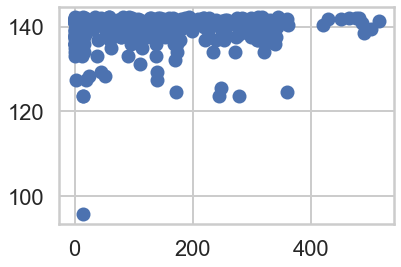

In [1436]:
#Visualization of the model prediction.
y_pred = FModel.predict(X_test)
plt.scatter(y_test,y_pred)

# Ordinary Least Squares (OLS) Model: Second model

In [1437]:
X = df[["number_of_applications"]]
X = sm.add_constant(X)

In [1438]:
y = df[["program_duration_days"]]

# Splitting the data using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [1439]:
#Building the second model
SModel = sm.OLS(y_train, X_train)

# Fitting the model
SModel_results = SModel.fit()
# Evaluating the model
SModel_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     program_duration_days   R-squared:                       0.002
Model:                               OLS   Adj. R-squared:                  0.001
Method:                    Least Squares   F-statistic:                     1.535
Date:                   Wed, 23 Jun 2021   Prob (F-statistic):              0.216
Time:                           08:02:13   Log-Likelihood:                -5608.0
No. Observations:                    895   AIC:                         1.122e+04
Df Residuals:                        893   BIC:                         1.123e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    142.3182      5.139     27.691      0.000     132.231     152.405
number_of_applications    -0.0932      0.075     -1.239      0.216      -0.241       0.054
==============================================================================
Omnibus:                       72.448   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.499
Skew:                           0.773   Prob(JB):                     3.68e-20
Kurtosis:                       2.914   Cond. No.                         82.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model seems like a round up of the first model with Rsquare of 0.002. Not good.

Text(0, 0.5, 'Predicted')

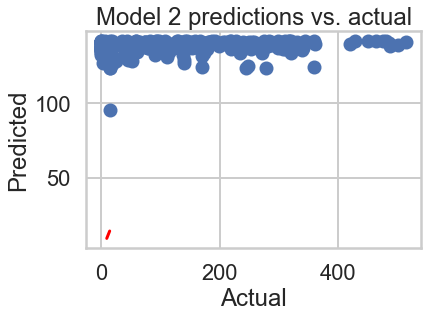

In [1440]:
#using the second model to make prediction.
y_pred = SModel_results.predict(X_test)

plt.scatter(y_test, y_pred)

plt.plot([x for x in range(9,15)],[x for x in range(9,15)], color='red')

plt.title("Model 2 predictions vs. actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# avoiding redundancy: Third Model

In [1441]:
X = df[['program_duration_days',
       'number_of_applications']]

# Creating constants for X, so the model knows its bounds
X = sm.add_constant(X)

y = df[["program_duration_days"]]

# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [1442]:
# Creating the third model
TModel = sm.OLS(y_train, X_train)
# Fitting the model
TModel_results = TModel.fit()
# Evaluating the model
TModel_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     program_duration_days   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 1.777e+32
Date:                   Wed, 23 Jun 2021   Prob (F-statistic):               0.00
Time:                           08:02:13   Log-Likelihood:                 24892.
No. Observations:                    895   AIC:                        -4.978e+04
Df Residuals:                        892   BIC:                        -4.976e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.606e-13   1.11e-14    -14.444      0.000   -1.82e-13   -1.39e-13
program_duration_days      1.0000   5.31e-17   1.88e+16      0.000       1.000       1.000
number_of_applications  2.272e-16   1.19e-16      1.902      0.057   -7.23e-18    4.62e-16
==============================================================================
Omnibus:                       84.319   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.136
Skew:                          -0.843   Prob(JB):                     5.44e-24
Kurtosis:                       3.181   Cond. No.                         313.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
This is perhaps the best model for predicting the program duration with Rsquare value of 1!

In [1443]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

y_pred = TModel_results.predict(X_test)
matches = pd.DataFrame(y_test)
matches.rename(columns = {'program_duration_days':'actual'}, inplace=True)
matches["predicted"] = y_pred

rmse(matches["actual"], matches["predicted"])

1.9300997357666538e-13

The RMSE tells us how far, on average, our predictions were mistaken. An RMSE of 0 would mean we were making perfect predictions. 0.49 signifies that we are, on average, about 0.49 of a unit of placed value away from the correct answer. That's not bad at all

# Logistic Regression

# Training and Test Datasets

In [1444]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df[['program_duration_days','number_of_applications']].values, 
                                              (df.placed == 1).values,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.5953177257525084


# Tuning the Model

In [1445]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [1446]:
clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print(score)

0.5664804469273743


In [1447]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

for C in Cs:
    model=LogisticRegression()
    av_score = cv_score(model, Xlr, ylr)
    print("for C :", C)
    print("average score is:", av_score)

for C : 0.001
average score is: 0.5664804469273743
for C : 0.1
average score is: 0.5664804469273743
for C : 1
average score is: 0.5664804469273743
for C : 10
average score is: 0.5664804469273743
for C : 100
average score is: 0.5664804469273743


In [1448]:
# your turn
model=LogisticRegression(C=10)
# Fit the model on the trainng data.
model.fit(Xlr, ylr)
y_pred=model.predict(Xtestlr)
acc_score = accuracy_score(ytestlr, y_pred)
acc_score

0.5953177257525084

# Black Box Grid Search

In [1449]:
from sklearn.model_selection import GridSearchCV
model=LogisticRegression()
Cs = {'C': [0.001, 0.1, 1, 10, 100]}
b_model= GridSearchCV(model, Cs, cv=5)
b_model.fit(Xlr, ylr)
y_pred=b_model.predict(Xtestlr)
acc_score = accuracy_score(ytestlr, y_pred)
acc_score

0.5953177257525084

# Setting up Demo Code

In [1450]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = sklearn.model_selection.GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

In [1451]:
from sklearn.model_selection import train_test_split

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print("Accuracy on training data: {:0.2f}".format(training_accuracy))
    print("Accuracy on test data:     {:0.2f}".format(test_accuracy))
    return clf, Xtrain, ytrain, Xtest, ytest

In [1452]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
sns.set_style("whitegrid")
sns.set_context("poster")
import sklearn.model_selection

c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, 
                cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, 
               s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, 
               alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, 
                     cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, 
                           colorscale=colorscale, cdiscrete=cdiscrete, 
                           psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    #plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax

In [1453]:
clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l  = do_classify(LogisticRegression(), 
                                                           {"C": [0.01, 0.1, 1, 10, 100]}, 
                                                           df, ['program_duration_days','number_of_applications'], 'placed', 1)

BEST PARAMS {'C': 0.01}
Accuracy on training data: 0.59
Accuracy on test data:     0.63


<ipython-input-1452-c11e95cd7d8f>:57: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
<ipython-input-1452-c11e95cd7d8f>:58: UserWarning: The following kwargs were not used by contour: 'axes'
  cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)


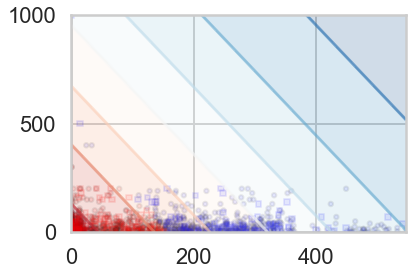

In [1454]:
plt.figure()
ax = plt.gca()
points_plot_prob(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, psize=20, alpha=0.1);